In [14]:

import pandas as pd
from tensortrade.exchanges.simulated import SimulatedExchange

df = pd.read_csv('data/Coinbase_BTCUSD_1h.csv', skiprows=1)
exchange = SimulatedExchange(data_frame=df, base_instrument='USD', pretransform=True)

In [15]:
from tensortrade.features import FeaturePipeline
from tensortrade.features.scalers import MinMaxNormalizer
from tensortrade.features.stationarity import FractionalDifference

normalize_price = MinMaxNormalizer(["open", "high", "low", "close"])
difference_all = FractionalDifference(difference_order=0.6)

feature_pipeline = FeaturePipeline(steps=[normalize_price, difference_all])

exchange.feature_pipeline = feature_pipeline

In [16]:
from tensortrade.actions import DiscreteActions

action_scheme = DiscreteActions(n_actions=20, instrument='BTC')

In [17]:
from tensortrade.rewards import SimpleProfit

reward_scheme = SimpleProfit()

In [18]:
from tensortrade.environments import TradingEnvironment

environment = TradingEnvironment(exchange=exchange,
                                 feature_pipeline=feature_pipeline,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme)

In [19]:
from stable_baselines.common.policies import MlpLnLstmPolicy
from stable_baselines import PPO2

model = PPO2
policy = MlpLnLstmPolicy
params = { "learning_rate": 1e-5, 'nminibatches': 1 }

In [20]:
from tensortrade.strategies import StableBaselinesTradingStrategy

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

In [21]:
performance = strategy.run(steps=10000)

Finished running strategy.
Total episodes: 2 (10000 timesteps).
Average reward: -0.6580452524729262.


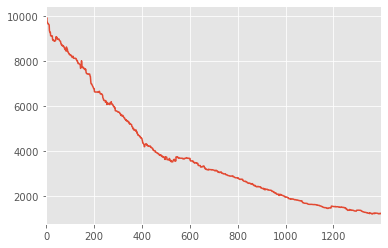

In [22]:
%matplotlib inline

performance.net_worth.plot()

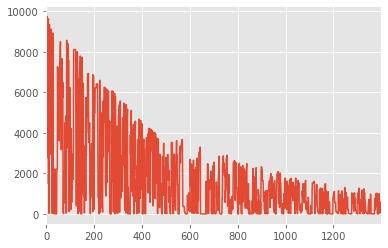

In [23]:
performance.balance.plot()

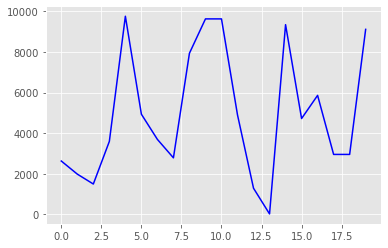

In [41]:
import matplotlib.pyplot as plt
plt.plot(performance['balance'].values[:20].ravel(),color='blue')
plt.show()

In [42]:
strategy.save_agent(path="ppo_btc_1h")

In [40]:
performance['balance'].values[:20].ravel()

array([2626.46312232, 1981.41902863, 1494.4170912 , 3593.43222772,
       9758.09609247, 4932.2713046 , 3691.39920213, 2784.10996118,
       7936.91390479, 9627.48287763, 9627.48287763, 4898.68081406,
       1286.62137837,   21.69449854, 9343.03905339, 4720.04144785,
       5860.33000666, 2952.03114255, 2952.03114255, 9111.40982774])